<a href="https://colab.research.google.com/github/Sabah-Hilal/DataMining-project/blob/main/AI_detector_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from datasets import load_dataset

In [4]:
dataset = load_dataset("artem9k/ai-text-detection-pile")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.87k [00:00<?, ?B/s]

(…)-00000-of-00007-bc5952582e004d67.parquet:   0%|          | 0.00/758M [00:00<?, ?B/s]

(…)-00001-of-00007-71c80017bc45f30d.parquet:   0%|          | 0.00/318M [00:00<?, ?B/s]

(…)-00002-of-00007-ee2d43f396e78fbc.parquet:   0%|          | 0.00/125M [00:00<?, ?B/s]

(…)-00003-of-00007-529931154b42b51d.parquet:   0%|          | 0.00/137M [00:00<?, ?B/s]

(…)-00004-of-00007-b269dc49374a2c0b.parquet:   0%|          | 0.00/137M [00:00<?, ?B/s]

(…)-00005-of-00007-3dce5e05ddbad789.parquet:   0%|          | 0.00/258M [00:00<?, ?B/s]

(…)-00006-of-00007-3d8a471ba0cf1c8d.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1392522 [00:00<?, ? examples/s]

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['source', 'id', 'text'],
        num_rows: 1392522
    })
})


In [ ]:
print(dataset['train'].features)

{'source': Value(dtype='string', id=None), 'id': Value(dtype='int64', id=None), 'text': Value(dtype='string', id=None)}


In [ ]:
missing_text = [i for i, sample in enumerate(dataset['train']) if not sample['text'] or sample['text'].strip() == ""]
print(f"Number of missing values: {len(missing_text)}")

Number of missing values: 341


In [ ]:
missing_labels = [i for i, sample in enumerate(dataset['train']) if not sample['source']]
print(f"Number of missing labels: {len(missing_labels)}")

Number of missing labels: 0


In [5]:
def filter_missing_data(example):

  return bool(example['text'] and example['text'].strip())

filtered_dataset = dataset['train'].filter(filter_missing_data)

print(f"dataset size after delete the missing values: {len(filtered_dataset)}")

Filter:   0%|          | 0/1392522 [00:00<?, ? examples/s]

dataset size after delete the missing values: 1392181


In [ ]:
print(filtered_dataset)

Dataset({
    features: ['source', 'id', 'text'],
    num_rows: 1392181
})


In [ ]:
missing_text = [i for i, sample in enumerate(filtered_dataset) if not sample['text'] or sample['text'].strip() == ""]
print(f"Number of missing value: {len(missing_text)}")

Number of missing value: 0


In [ ]:
from collections import Counter
def filter_missing_data(example):
    return bool(example['text'] and example['text'].strip())

filtered_dataset = dataset['train'].filter(filter_missing_data)

text_counts = Counter(example['text'] for example in filtered_dataset)
num_duplicates = sum(count - 1 for count in text_counts.values() if count > 1)

print(f"Number of duplicate values: {num_duplicates}")

Filter:   0%|          | 0/1392522 [00:00<?, ? examples/s]

Number of duplicate values: 6338


In [6]:
from datasets import load_dataset, Dataset
seen_texts = set()
deduplicated_dataset = []
for example in filtered_dataset:
    if example['text'] not in seen_texts:
        seen_texts.add(example['text'])
        deduplicated_dataset.append(example)

C_dataset = Dataset.from_list(deduplicated_dataset)

print(f"dataset size after delete the duplicated values: {len(C_dataset)}")

dataset size after delete the duplicated values: 1385843


In [ ]:
print(C_dataset)

Dataset({
    features: ['source', 'id', 'text'],
    num_rows: 1385843
})


In [ ]:
unique_sources = set(sample['source'] for sample in C_dataset)
print(unique_sources)

{'human', 'ai'}


In [7]:
labels = [1 if sample['source'] == 'ai' else 0 for sample in C_dataset]

In [8]:
texts = [sample['text'] for sample in C_dataset]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

In [ ]:
print(f"Training samples: {len(X_train)}")

Training samples: 1108674


In [ ]:
print(f"Validation samples: {len(X_val)}")

Validation samples: 277169


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english',dtype='float32' )
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:2030: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pca = PCA(n_components=2)
X_train_tfidf_2d = pca.fit_transform(X_train_tfidf.toarray())

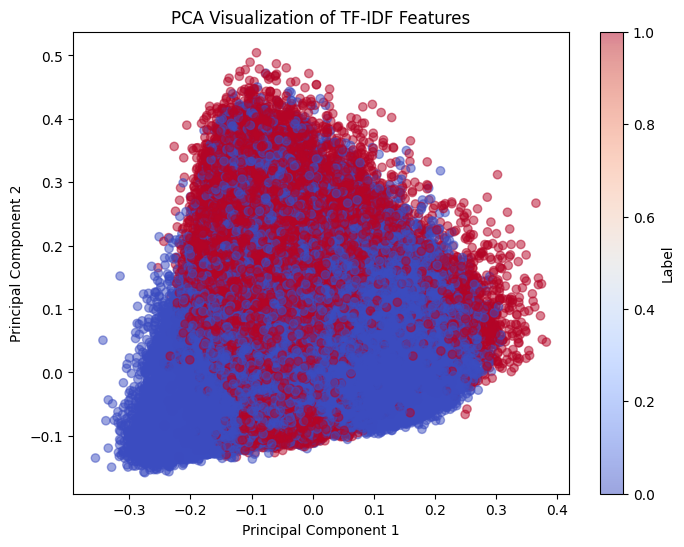

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tfidf_2d[:, 0], X_train_tfidf_2d[:, 1], c=y_train, cmap='coolwarm', alpha=0.5)
plt.title("PCA Visualization of TF-IDF Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Label")
plt.show()

<ipython-input-17-b0cb7c7ece87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_counts, palette="Set2")


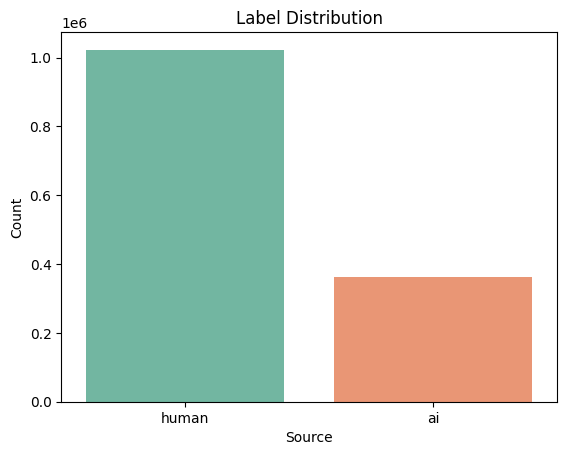

In [ ]:
label_counts = [sample['source'] for sample in C_dataset]
sns.countplot(x=label_counts, palette="Set2")
plt.title("Label Distribution")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

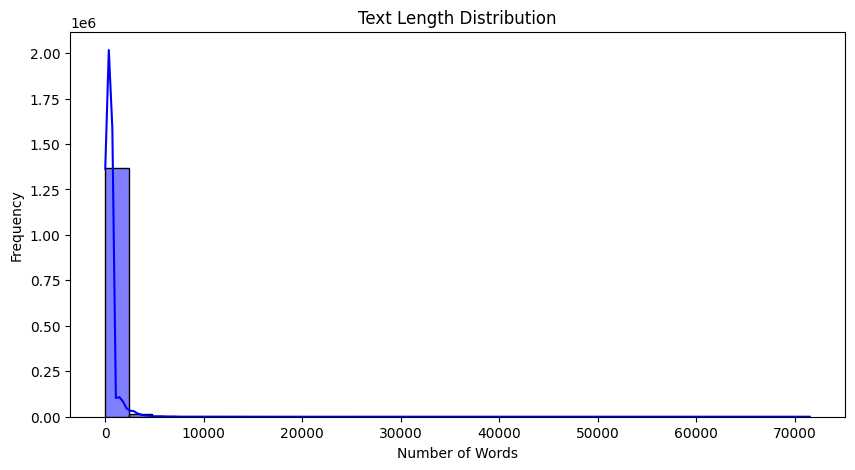

In [ ]:
text_lengths = [len(sample['text'].split()) for sample in C_dataset]

plt.figure(figsize=(10, 5))
sns.histplot(text_lengths, bins=30, kde=True, color='blue')
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_val_pred = model.predict(X_val_tfidf)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92    204218
           1       0.80      0.76      0.78     72951

    accuracy                           0.89    277169
   macro avg       0.86      0.84      0.85    277169
weighted avg       0.88      0.89      0.88    277169



In [18]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_val_pred))


Logistic Regression Accuracy: 0.8857087192290624


In [21]:
print("Logistic Regression AUC-ROC:", roc_auc_score(y_val, model.predict_proba(X_val_tfidf)[:, 1]))


Logistic Regression AUC-ROC: 0.9460266566748956


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [23]:
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Human", "AI"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

In [24]:
y_val_pred_logistic = model.predict(X_val_tfidf)


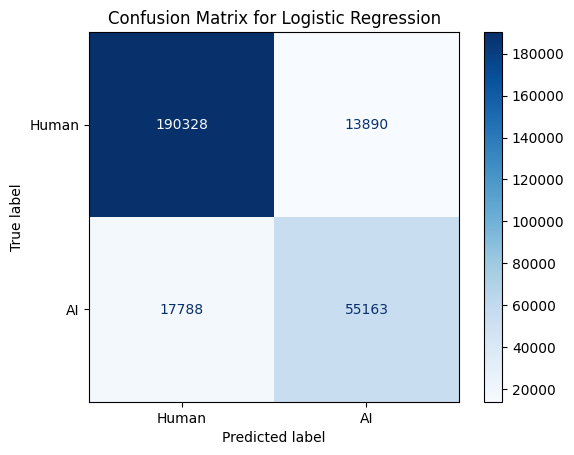

In [25]:
plot_confusion_matrix("Logistic Regression", y_val, y_val_pred_logistic)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=None, random_state=42,  n_jobs=-1
)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
from sklearn.svm import SVC


In [ ]:
y_val_pred = rf_model.predict(X_val_tfidf)


In [ ]:
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.8672


In [ ]:
print("Classification Report:")
print(classification_report(y_val, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91    204218
           1       0.81      0.65      0.72     72951

    accuracy                           0.87    277169
   macro avg       0.85      0.80      0.82    277169
weighted avg       0.86      0.87      0.86    277169



In [ ]:
y_val_prob = rf_model.predict_proba(X_val_tfidf)[:, 1]
auc_score = roc_auc_score(y_val, y_val_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

AUC-ROC Score: 0.9375


In [ ]:
y_val_pred_rf = rf_model.predict(X_val_tfidf)


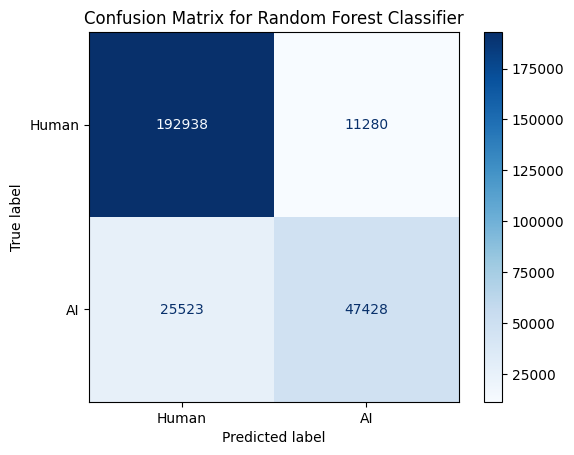

In [ ]:
plot_confusion_matrix("Random Forest Classifier", y_val, y_val_pred_rf)
